In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp

<AxesSubplot:>

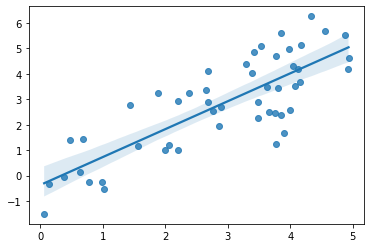

In [10]:
n = 50
x = np.random.uniform(0, 5, size=n) 
y = x + np.random.normal(size=n)

sns.regplot(x=x, y=y)

In [16]:
alpha = 0.05
res_arr = []
for ni in range(10, n+1):
    lmodi = sm.OLS(y[:ni], x[:ni]).fit()
    diagvi = lmodi.get_influence()
    stud = diagvi.resid_studentized_external
    max_stud = np.max(abs(stud))
    benf_crit_val = abs(sp.stats.t.ppf(0.05/(2*ni), n-lmodi.df_model))
    res_arr.append([max_stud, benf_crit_val])
res = pd.DataFrame(res_arr, columns=["max_stud", "benf_crit"])
res.head()

,max_stud,benf_crit
0,1.562757,2.939730
1,1.704262,2.974449
2,1.808421,3.005953
3,1.796203,3.034776
4,1.834299,3.061332


Text(0.5, 0, 'n')

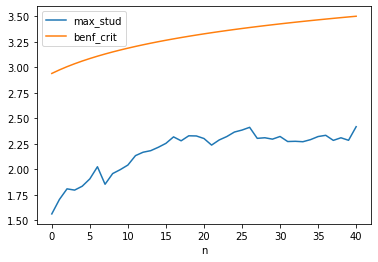

In [18]:
f, ax = plt.subplots(1, 1)

res.plot(ax=ax)
ax.set_xlabel('n')